In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
bs = 64
IMAGE_SIZE = [224, 224]

In [4]:

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob('dataset/dataset/train/*')
print(folders)

['dataset/dataset/train\\benign', 'dataset/dataset/train\\malware']


In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('dataset/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6020 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('dataset/dataset/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 187 images belonging to 2 classes.


In [13]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
189/189 [==============================] - 400s 2s/step - loss: 1.9106 - accuracy: 0.6523 - val_loss: 0.3470 - val_accuracy: 0.8556
Epoch 2/30
189/189 [==============================] - 393s 2s/step - loss: 0.3746 - accuracy: 0.8291 - val_loss: 0.2203 - val_accuracy: 0.9198
Epoch 3/30
189/189 [==============================] - 392s 2s/step - loss: 0.3318 - accuracy: 0.8630 - val_loss: 0.2375 - val_accuracy: 0.9091
Epoch 4/30
189/189 [==============================] - 392s 2s/step - loss: 0.2743 - accuracy: 0.8920 - val_loss: 0.2442 - val_accuracy: 0.9198
Epoch 5/30
189/189 [==============================] - 392s 2s/step - loss: 0.2683 - accuracy: 0.8930 - val_loss: 0.1704 - val_accuracy: 0.9305
Epoch 6/30
189/189 [==============================] - 392s 2s/step - loss: 0.2697 - accuracy: 0.8945 - val_loss: 0.5569 - val_accuracy: 0.7540
Epoch 7/30
189/189 [==============================] - 393s 2s/step - loss: 0.2349 - accuracy: 0.9008 - val_loss: 0.1811 - val_accuracy: 0.9465

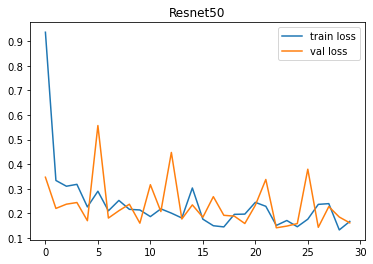

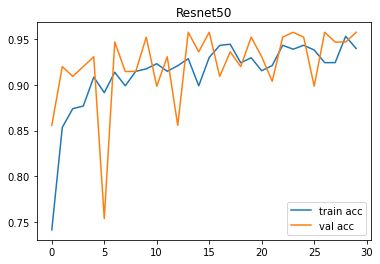

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.title("Resnet50")
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.title("Resnet50")
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
from tensorflow.keras.models import load_model

model.save('colormodel.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [ ]:
img=image.load_img('/content/DS/dataset/valid/benign/$R00CNX3.exe.png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x.reshape((224,224,3)), cmap='Greys')

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
from contextlib import redirect_stdout

with open('summary.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()

In [ ]:
pip install pillow

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.c)
print(data.classes)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [ ]:
learn.model

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.fit_one_cycle(10)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs =  interp.top_losses()
interp.plot_top_losses(9,figsize=(9,6))

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10)

In [ ]:
learn.save('stage-1-malware-detection.h5')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs =  interp.top_losses()
interp.plot_top_losses(9,figsize=(9,6))

In [ ]:
learn.save('stage-2-malware-detection.h5')

In [ ]:
learn.summary()

In [10]:
from keras.applications.vgg16 import VGG16
vgg16=VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [11]:
for layer in vgg16.layers:
    layer.trainable = False

In [12]:
x = Flatten()(vgg16.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/40
189/189 [==============================] - 736s 4s/step - loss: 0.4258 - accuracy: 0.8123 - val_loss: 0.1499 - val_accuracy: 0.9412
Epoch 2/40
189/189 [==============================] - 739s 4s/step - loss: 0.1251 - accuracy: 0.9589 - val_loss: 0.0860 - val_accuracy: 0.9679
Epoch 3/40
189/189 [==============================] - 782s 4s/step - loss: 0.0873 - accuracy: 0.9721 - val_loss: 0.0684 - val_accuracy: 0.9786
Epoch 4/40
189/189 [==============================] - 794s 4s/step - loss: 0.0765 - accuracy: 0.9757 - val_loss: 0.0793 - val_accuracy: 0.9733
Epoch 5/40
189/189 [==============================] - 809s 4s/step - loss: 0.0618 - accuracy: 0.9806 - val_loss: 0.0568 - val_accuracy: 0.9947
Epoch 6/40
189/189 [==============================] - 812s 4s/step - loss: 0.0700 - accuracy: 0.9783 - val_loss: 0.0544 - val_accuracy: 0.9947
Epoch 7/40
189/189 [==============================] - 808s 4s/step - loss: 0.0520 - accuracy: 0.9834 - val_loss: 0.1925 - val_accuracy: 0.9358

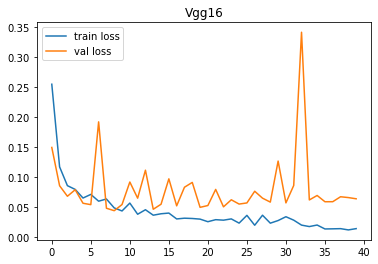

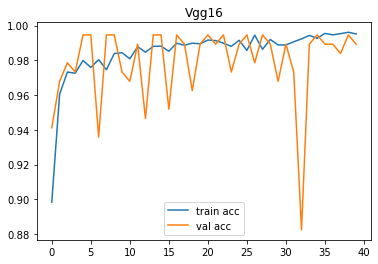

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.title("Vgg16")
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

plt.title("Vgg16")
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

In [19]:
from tensorflow.keras.models import load_model

model1.save('alex.h5')

In [8]:
from keras.applications import MobileNet
alex=MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
for layer in alex.layers:
    layer.trainable = False

In [11]:
x = Flatten()(alex.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=alex.input, outputs=prediction)

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
189/189 [==============================] - 124s 646ms/step - loss: 0.6631 - accuracy: 0.8984 - val_loss: 0.0953 - val_accuracy: 0.9679
Epoch 2/30
189/189 [==============================] - 118s 625ms/step - loss: 0.1856 - accuracy: 0.9724 - val_loss: 0.1368 - val_accuracy: 0.9733
Epoch 3/30
189/189 [==============================] - 119s 627ms/step - loss: 0.1274 - accuracy: 0.9839 - val_loss: 0.4446 - val_accuracy: 0.9572
Epoch 4/30
189/189 [==============================] - 118s 625ms/step - loss: 0.1542 - accuracy: 0.9804 - val_loss: 0.8385 - val_accuracy: 0.9786
Epoch 5/30
189/189 [==============================] - 119s 627ms/step - loss: 0.1254 - accuracy: 0.9827 - val_loss: 0.6718 - val_accuracy: 0.9679
Epoch 6/30
189/189 [==============================] - 118s 627ms/step - loss: 0.0875 - accuracy: 0.9865 - val_loss: 1.0125 - val_accuracy: 0.9626
Epoch 7/30
189/189 [==============================] - 118s 627ms/step - loss: 0.0296 - accuracy: 0.9943 - val_loss: 0.6530 -

In [ ]:
# plot the loss
plt.title("MobileNet")
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

plt.title("MobileNet")
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

In [18]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [19]:
Inception= InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [20]:
for layer in Inception.layers:
    layer.trainable = False

In [21]:
x = Flatten()(Inception.output)

In [22]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=Inception.input, outputs=prediction)

In [23]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [24]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
189/189 [==============================] - 201s 1s/step - loss: 1.8830 - accuracy: 0.7933 - val_loss: 0.2164 - val_accuracy: 0.9358
Epoch 2/30
189/189 [==============================] - 192s 1s/step - loss: 0.1457 - accuracy: 0.9565 - val_loss: 0.1111 - val_accuracy: 0.9572
Epoch 3/30
189/189 [==============================] - 191s 1s/step - loss: 0.1602 - accuracy: 0.9619 - val_loss: 0.2273 - val_accuracy: 0.9358
Epoch 4/30
189/189 [==============================] - 192s 1s/step - loss: 0.1210 - accuracy: 0.9727 - val_loss: 0.2027 - val_accuracy: 0.9572
Epoch 5/30
189/189 [==============================] - 192s 1s/step - loss: 0.1531 - accuracy: 0.9662 - val_loss: 0.2972 - val_accuracy: 0.9465
Epoch 6/30
189/189 [==============================] - 192s 1s/step - loss: 0.0999 - accuracy: 0.9748 - val_loss: 0.2767 - val_accuracy: 0.9519
Epoch 7/30
189/189 [==============================] - 192s 1s/step - loss: 0.0533 - accuracy: 0.9873 - val_loss: 0.1376 - val_accuracy: 0.9679

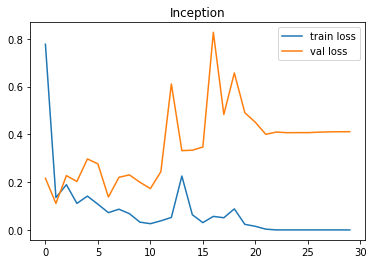

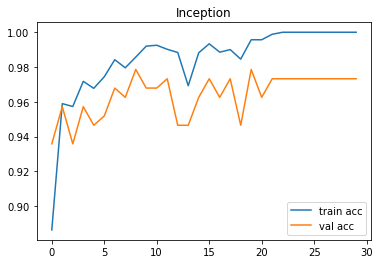

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
plt.title("Inception")
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

plt.title("Inception")
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

In [21]:
from tensorflow.keras.models import load_model

model.save('incep.h5')

In [26]:
from tensorflow.keras.applications.densenet import DenseNet121

In [27]:
dnet= DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [28]:
for layer in dnet.layers:
    layer.trainable = False

In [29]:
x = Flatten()(dnet.output)

In [30]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=dnet.input, outputs=prediction)

In [31]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [32]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
189/189 [==============================] - 467s 2s/step - loss: 0.3725 - accuracy: 0.8824 - val_loss: 0.2243 - val_accuracy: 0.9733
Epoch 2/30
189/189 [==============================] - 449s 2s/step - loss: 0.1273 - accuracy: 0.9612 - val_loss: 0.3575 - val_accuracy: 0.9519
Epoch 3/30
189/189 [==============================] - 459s 2s/step - loss: 0.0523 - accuracy: 0.9844 - val_loss: 0.2847 - val_accuracy: 0.9465
Epoch 4/30
189/189 [==============================] - 453s 2s/step - loss: 0.0934 - accuracy: 0.9727 - val_loss: 0.5770 - val_accuracy: 0.9572
Epoch 5/30
189/189 [==============================] - 461s 2s/step - loss: 0.0394 - accuracy: 0.9847 - val_loss: 0.5378 - val_accuracy: 0.9679
Epoch 6/30
189/189 [==============================] - 445s 2s/step - loss: 0.0344 - accuracy: 0.9877 - val_loss: 0.4392 - val_accuracy: 0.9679
Epoch 7/30
189/189 [==============================] - 445s 2s/step - loss: 0.0473 - accuracy: 0.9838 - val_loss: 0.5517 - val_accuracy: 0.9679

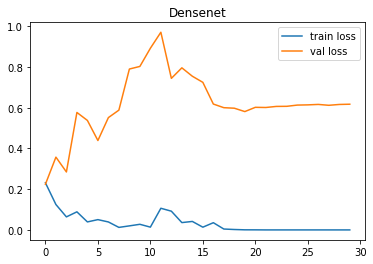

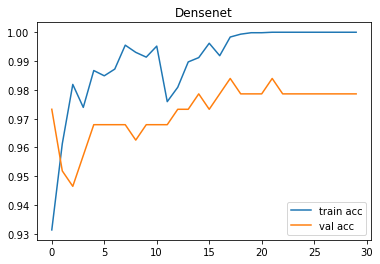

<Figure size 432x288 with 0 Axes>

In [33]:
# plot the loss
plt.title("Densenet")
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

plt.title("Densenet")
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

In [17]:
from tensorflow.keras.models import load_model

model.save('dense3.h5')